<a href="https://colab.research.google.com/github/vg11072001/Machine-Learning/blob/main/projects/Visualizing_Filters_of_a_CNN_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

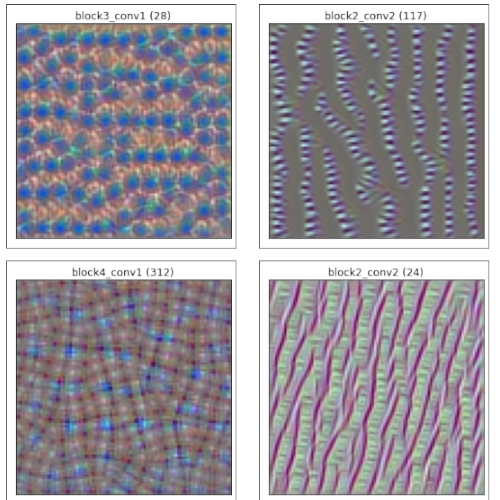

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print("Tensorflow version", tf.__version__)

Tensorflow version 2.9.2


In [3]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, weights = 'imagenet', input_shape = (96,96,3)
)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

## Task 3: Get Layer Output

In [4]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input, model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [5]:
def create_image():
  return tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)

def plot_image(image, title = 'random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


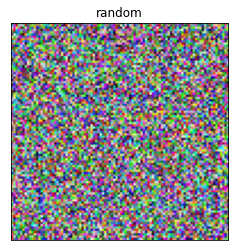

In [6]:
image = create_image()
plot_image(image)

## Task 5: Training Loop

In [20]:
def visualize_filter(layer_name, f_index = None, iters = 50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters - 1)
  assert num_filters>f_index, 'f_index is out of bounds'

  image= create_image()
  verbose_step = int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis = 0))[:,:,:, f_index]
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads*10

    if(i+1) % verbose_step ==0:
      print(f'Iteration: {i+1}, Loss: {loss.numpy():.4f}')

  plot_image(image, f'{layer_name}, {f_index}')

## Task 6: Final Results

In [21]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10, Loss: 7.1244
Iteration: 20, Loss: 15.0653
Iteration: 30, Loss: 23.2360
Iteration: 40, Loss: 31.5673
Iteration: 50, Loss: 41.2354
Iteration: 60, Loss: 51.4263
Iteration: 70, Loss: 62.9478
Iteration: 80, Loss: 76.4549
Iteration: 90, Loss: 90.6972
Iteration: 100, Loss: 106.3288


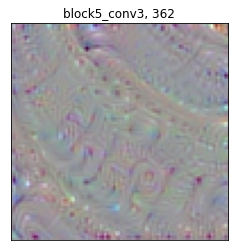

In [27]:
layer_name = 'block5_conv3' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, iters = 100)